# Read data

In [455]:
import pandas as pd
import numpy as np
from numpy import savetxt
from numpy import genfromtxt
from sklearn import preprocessing
from sklearn.feature_selection import f_classif
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

In [456]:
import pandas as pd
train_data = pd.read_csv('pp5i_train.gr.csv') #read csv file
test_data = pd.read_csv('pp5i_test.gr.csv')
class_data = pd.read_csv('pp5i_train_class.txt')

In [457]:
train_data.info

<bound method DataFrame.info of               SNO    1    2    3    4    5    6    7    8    9  ...   60   61  \
0       A28102_at   30   46   31   31   26   28   35   29   21  ...   35   49   
1     AB000114_at   22   31   19   16   26   24   29   20   23  ...   38   30   
2     AB000115_at   29   70   12   11   14   13   14   18   10  ...   20  205   
3     AB000220_at   76  208  244   39   85   23  634  159   50  ...   55  203   
4     AB000409_at  167  211  179  119  161  166  228  267  260  ...  137  180   
...           ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
7065    X83863_at  116  123  142  134  153  152  139  213  193  ...  117  203   
7066    Z17240_at   44   43   44   38   42   46   46   52   32  ...   30   37   
7067  L49218_f_at    6    9   10    9    7    7   10    0    5  ...    4    8   
7068  M71243_f_at   30   31   28   21   26   29   32   57   34  ...   27   26   
7069  Z78285_f_at    0   -1   -2    0   -2   -2    0   -2   -3  ...    0   -1

In [458]:
test_data.info

<bound method DataFrame.info of               SNO  101  102  103  104  105  106  107  108  109  ...  114  115  \
0       A28102_at   58   52   13   46   48   31   16   23   47  ...   11   19   
1     AB000114_at   36   34   32   30   22   57   17   19   29  ...   17   57   
2     AB000115_at   10  255    0   14   17   -6   15   17   33  ...   18   -2   
3     AB000220_at   64   19  133   62  110   77   22   33  132  ...   84   34   
4     AB000409_at   17  220  186  232  169  251  210  142  131  ...  209  166   
...           ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
7065    X83863_at  288  161  400  206  171  257  216  155  284  ...  164  494   
7066    Z17240_at   74   33   36   44   42   43   23   51   35  ...   39  104   
7067  L49218_f_at    5    6  -24   13    8    9    7    8    6  ...    4    7   
7068  M71243_f_at   61   22   55   51   16   82   48   34   24  ...   37   36   
7069  Z78285_f_at    0   -1    2    0   -2    9  -13   -2    1  ...    0    6

In [459]:
from sklearn import preprocessing
class_numpy = class_data.to_numpy()
lableEncode =  preprocessing.LabelEncoder()
lableEncode.fit(class_numpy)
train_class = lableEncode.transform(class_numpy)

In [460]:
train_class

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3,
       3, 3, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1])

# Step 1. Data Cleaning

In [461]:
##Separate textual and numeric data 
train_data_sno = train_data['SNO']
train_data_drop_sno = train_data.iloc[:,1:] #set filter to extract data except "SNO"
test_data_sno = test_data['SNO'] 
test_data_drop_sno = test_data.iloc[:,1:] #set filter to extract data except "SNO"

In [462]:
train_data_drop_sno = train_data_drop_sno.clip(lower=20, upper=16000) #drop the trian data which is below 20 or over 1600
test_data_drop_sno = test_data_drop_sno.clip(lower=20, upper=16000) #drop the test data which is below 20 or over 1600

In [463]:
train_data_class = train_data_drop_sno.max(axis=1)/train_data_drop_sno.min(axis=1)
#train_data_class = abs(train_data_class)
delect_index = train_data_class[train_data_class<2].index #create an index which can be used to delete related unuseful genes

In [464]:
train_sno_data_drop = train_data['SNO'].drop(delect_index) #set filter to drop the relavent row according to index
train_data_data_drop = train_data_drop_sno.drop(delect_index) #set filter to drop the relavent row according to index

test_sno_data_drop = test_data['SNO'].drop(delect_index) #set filter to drop the relavent row according to index
test_data_data_drop = test_data_drop_sno.drop(delect_index) #set filter to drop the relavent row according to index

train_data = pd.concat([train_sno_data_drop, train_data_data_drop], axis=1, sort=False) #Combining train's numeric and textual data
test_data = pd.concat([test_sno_data_drop , test_data_data_drop], axis=1, sort=False) #Combining test's numeric and textual data

In [465]:
train_data

,SNO,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,A28102_at,30,46,31,31,26,28,35,29,21,...,35,49,31,51,71,68,77,56,41,38
1,AB000114_at,22,31,20,20,26,24,29,20,23,...,38,30,22,24,20,21,22,25,21,20
2,AB000115_at,29,70,20,20,20,20,20,20,20,...,20,205,20,61,62,35,30,65,32,25
3,AB000220_at,76,208,244,39,85,23,634,159,50,...,55,203,152,53,28,30,31,31,27,20
4,AB000409_at,167,211,179,119,161,166,228,267,260,...,137,180,107,147,170,131,132,158,164,172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7061,U58516_at,161,265,126,163,138,107,99,137,161,...,410,238,718,374,198,364,251,315,248,285
7063,X06956_at,34,98,21,20,29,20,57,20,23,...,101,25,39,56,26,34,45,27,46,61
7065,X83863_at,116,123,142,134,153,152,139,213,193,...,117,203,136,118,234,297,267,290,255,397
7066,Z17240_at,44,43,44,38,42,46,46,52,32,...,30,37,39,20,47,39,42,36,44,38


In [466]:
test_data

,SNO,101,102,103,104,105,106,107,108,109,...,114,115,116,117,118,119,120,121,122,123
0,A28102_at,58,52,20,46,48,31,20,23,47,...,20,20,20,70,50,29,47,44,56,119
1,AB000114_at,36,34,32,30,22,57,20,20,29,...,20,57,25,50,36,26,28,34,45,53
2,AB000115_at,20,255,20,20,20,20,20,20,33,...,20,20,20,148,145,20,361,20,20,34
3,AB000220_at,64,20,133,62,110,77,22,33,132,...,84,34,30,69,108,75,184,57,26,83
4,AB000409_at,20,220,186,232,169,251,210,142,131,...,209,166,260,241,165,111,170,147,246,204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7061,U58516_at,216,236,138,152,146,102,138,98,165,...,80,74,95,326,143,225,197,201,135,236
7063,X06956_at,20,20,33,20,28,20,55,22,31,...,20,20,20,20,23,20,26,52,20,20
7065,X83863_at,288,161,400,206,171,257,216,155,284,...,164,494,197,277,147,113,136,157,176,198
7066,Z17240_at,74,33,36,44,42,43,23,51,35,...,39,104,40,31,44,39,55,48,62,37


In order to use f_classif to get T value, turn train class into number.

In [467]:
from sklearn.feature_selection import f_classif
return_array = f_classif(train_data.T[1:], train_class)
train_data['T value'] = return_array[0]
test_data['T value'] = return_array[0]

train_data = train_data.sort_values('T value', ascending=False)
test_data = test_data.sort_values('T value', ascending=False)

In [468]:
train_data

,SNO,1,2,3,4,5,6,7,8,9,...,61,62,63,64,65,66,67,68,69,T value
2506,U00921_at,20,20,20,20,20,20,20,20,20,...,26,20,44,155,92,118,115,102,119,222.388504
6528,U59877_s_at,20,45,20,20,20,20,20,20,20,...,285,341,381,924,1499,923,1358,1081,1120,166.874021
6663,AF000424_s_at,20,20,20,20,20,20,20,20,20,...,20,20,34,128,63,73,102,94,92,162.284150
5503,D13631_s_at,21,54,20,31,20,20,20,20,20,...,114,141,89,329,365,331,396,314,293,148.242194
3688,U79242_at,20,20,20,20,32,20,20,20,20,...,31,20,20,261,175,153,192,185,121,139.143388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6861,X54489_rna1_at,20,20,20,20,20,20,20,20,20,...,20,20,33,20,20,20,20,20,20,0.102060
1241,L13042_at,50,53,48,42,40,43,61,30,26,...,41,36,34,36,34,48,40,41,30,0.099092
1658,M14159_cds2_at,48,85,108,27,54,46,24,20,20,...,82,78,35,63,56,20,62,48,38,0.092244
3355,U56816_at,122,73,79,120,151,119,67,100,40,...,74,103,88,98,93,114,73,76,103,0.081504


In [469]:
test_data

,SNO,101,102,103,104,105,106,107,108,109,...,115,116,117,118,119,120,121,122,123,T value
2506,U00921_at,20,25,20,20,20,20,20,20,42,...,20,20,20,20,20,20,20,20,20,222.388504
6528,U59877_s_at,176,20,20,20,20,20,20,20,96,...,20,20,240,210,20,180,278,20,185,166.874021
6663,AF000424_s_at,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,162.284150
5503,D13631_s_at,44,165,20,20,66,20,37,22,72,...,20,20,231,43,20,20,59,20,56,148.242194
3688,U79242_at,53,20,74,20,42,27,20,20,29,...,21,20,20,20,20,20,70,30,20,139.143388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6861,X54489_rna1_at,20,20,20,20,20,20,20,20,232,...,20,20,20,20,20,20,20,20,20,0.102060
1241,L13042_at,39,49,20,47,50,21,30,42,42,...,36,30,39,52,39,55,44,53,26,0.099092
1658,M14159_cds2_at,60,55,69,30,20,20,20,74,20,...,20,20,20,126,51,20,139,20,40,0.092244
3355,U56816_at,211,85,167,99,124,20,45,115,122,...,20,61,155,92,183,101,130,77,112,0.081504


For N=2,4,6,8,10,12,15,20,25,30 combine top genes for each class into one file (removing duplicates, if any) and call the resulting file pp5i_train.topN.gr.csv

In [470]:
from numpy import savetxt
from numpy import genfromtxt
TopN = [2,4,6,8,10,12,15,20,25,30]

def find(data):
    oreder = np.lexsort(data.T)
    data = data[oreder]
    diff = np.diff(data, axis=0)
    ui = np.ones(len(data), 'bool')
    ui[1:] = (diff != 0).any(axis=1) 
    return data[ui]

for num in TopN:
    train_x = train_data.drop('SNO', axis = 1)
    train_x = train_x.drop('T value', axis = 1)
    train_x = train_x.to_numpy()
    train_x = train_x[:num].T #transpose each file to "genes-in-columns" format
    train_x_num = np.c_[train_x, train_class] #Join two matrices by rows
    train_x_num = find(train_x_num)
    
    filename = "pp5i_train.top"+str(num)+".gr.csv"
    savetxt(filename, train_x_num, delimiter = ',')

# Find the best classifier/best gene set combination

In [471]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import sklearn.neighbors as skneighbors
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

# 5 models

KNN

In [472]:
import matplotlib.pyplot as plt
arr = np.zeros((10,6)) #storage results
row =0
arr_error = np.zeros((10,6))
row_error =0

'''
For KNN classifier, using default settings, measure classifier 
accuracy on the training set using previously generated files 
with top N=2, 4, 6, 8, 10, 12, 15, 20, 25, 30

'''

for i in TopN:
  i_row = list()
  i_row.append(i)

  col =0
  arr[row][col]=i

  filename="pp5i_train.top"+str(i)+".gr.csv"
  data_arr = np.genfromtxt(filename,delimiter=',') 
  train_x = data_arr[:,:-1]
  train_y = data_arr[:,-1]

  #use K=3 to train 
  knn_model = skneighbors.KNeighborsClassifier(n_neighbors=3)
  knn_model.fit(train_x, train_y)
  scores = cross_val_score(knn_model, train_x, train_y,cv=4)
  i_row.append(scores.mean())
  col+=1
  arr[row][col] = 1-scores.mean() #calculate error rate of Cross-validation
  row+=1

#calculate error rate
  i_row_error = list()
  i_row_error.append(i)
  col_error =0
  arr_error[row_error][col_error]=i
  score = knn_model.score(train_x, train_y)
  i_row_error.append(score.mean())
  col_error +=1
  arr_error[row_error][col_error] = score.mean()
  row_error+=1

In [473]:
train_y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 4., 4., 4., 4., 4., 4.,
       4.])

Naïve Bayes

In [474]:
row =0
col = 2
row_error =0
col_error = 2
'''
For GaussianNB classifier, using default settings, measure classifier 
accuracy on the training set using previously generated files 
with top N=2, 4, 6, 8, 10, 12, 15, 20, 25, 30

'''
for i in TopN:         

  filename="pp5i_train.top"+str(i)+".gr.csv"
  data_arr = np.genfromtxt(filename,delimiter=',') 
  train_x = data_arr[:,:-1]
  train_y = data_arr[:,-1]

  GaussianNB_model = GaussianNB()
  GaussianNB_model.fit(train_x, train_y)
  scores = cross_val_score(GaussianNB_model, train_x, train_y,cv=4)
  i_row.append(scores.mean())
  arr[row][col] = 1-scores.mean() #calculate error rate
  row+=1

#calculate error rate
  i_row_error = list()
  i_row_error.append(i)
  score = GaussianNB_model.score(train_x, train_y)
  i_row_error.append(score.mean())
  arr_error[row_error][col_error] = score.mean()
  row_error+=1

In [475]:
arr_error

array([[ 2.        ,  0.67741935,  0.5483871 ,  0.        ,  0.        ,
         0.        ],
       [ 4.        ,  0.75675676,  0.40540541,  0.        ,  0.        ,
         0.        ],
       [ 6.        ,  0.71111111,  0.71111111,  0.        ,  0.        ,
         0.        ],
       [ 8.        ,  0.86764706,  0.54411765,  0.        ,  0.        ,
         0.        ],
       [10.        ,  0.88405797,  0.60869565,  0.        ,  0.        ,
         0.        ],
       [12.        ,  0.94202899,  0.60869565,  0.        ,  0.        ,
         0.        ],
       [15.        ,  0.95652174,  0.85507246,  0.        ,  0.        ,
         0.        ],
       [20.        ,  0.97101449,  0.82608696,  0.        ,  0.        ,
         0.        ],
       [25.        ,  1.        ,  0.91304348,  0.        ,  0.        ,
         0.        ],
       [30.        ,  0.98550725,  0.92753623,  0.        ,  0.        ,
         0.        ]])

DecisionTreeClassifier

In [476]:
row =0
col = 3
row_error =0
col_error = 3
'''
For DecisionTreeClassifier classifier, using default settings, measure classifier 
accuracy on the training set using previously generated files 
with top N=2, 4, 6, 8, 10, 12, 15, 20, 25, 30

'''
for i in TopN:

  filename="pp5i_train.top"+str(i)+".gr.csv"
  data_arr = np.genfromtxt(filename,delimiter=',') 
  train_x = data_arr[:,:-1]
  train_y = data_arr[:,-1]

  DecisionTree_model = DecisionTreeClassifier(random_state=30, max_depth=3)
  DecisionTree_model.fit(train_x, train_y)
  scores = cross_val_score(DecisionTree_model, train_x, train_y,cv=4)
  i_row.append(scores.mean())
  arr[row][col] = 1-scores.mean() #calculate error rate
  row+=1

  #calculate error rate
  i_row_error = list()
  i_row_error.append(i)
  score = DecisionTree_model.score(train_x, train_y)
  i_row_error.append(score.mean())
  arr_error[row_error][col_error] = score.mean()
  row_error+=1

In [477]:
arr_error

array([[ 2.        ,  0.67741935,  0.5483871 ,  0.64516129,  0.        ,
         0.        ],
       [ 4.        ,  0.75675676,  0.40540541,  0.64864865,  0.        ,
         0.        ],
       [ 6.        ,  0.71111111,  0.71111111,  0.73333333,  0.        ,
         0.        ],
       [ 8.        ,  0.86764706,  0.54411765,  0.88235294,  0.        ,
         0.        ],
       [10.        ,  0.88405797,  0.60869565,  0.88405797,  0.        ,
         0.        ],
       [12.        ,  0.94202899,  0.60869565,  0.88405797,  0.        ,
         0.        ],
       [15.        ,  0.95652174,  0.85507246,  1.        ,  0.        ,
         0.        ],
       [20.        ,  0.97101449,  0.82608696,  1.        ,  0.        ,
         0.        ],
       [25.        ,  1.        ,  0.91304348,  1.        ,  0.        ,
         0.        ],
       [30.        ,  0.98550725,  0.92753623,  1.        ,  0.        ,
         0.        ]])

A neural network

In [478]:
row =0
col = 4
row_error =0
col_error = 4
'''
For MLP classifier, using default settings, measure classifier 
accuracy on the training set using previously generated files 
with top N=2, 4, 6, 8, 10, 12, 15, 20, 25, 30

'''
for i in TopN:

  filename="pp5i_train.top"+str(i)+".gr.csv"
  data_arr = np.genfromtxt(filename,delimiter=',') 
  train_x = data_arr[:,:-1]
  train_y = data_arr[:,-1]

  MLP_model = MLPClassifier(activation='relu',hidden_layer_sizes=(32,),random_state=1,solver='lbfgs',learning_rate='constant',learning_rate_init=0.0001,max_iter=1000)
  MLP_model.fit(train_x, train_y)
  scores = cross_val_score(MLP_model, train_x, train_y,cv=5)
  i_row.append(scores.mean())
  arr[row][col] = 1-scores.mean() #calculate error rate
  row+=1

  #calculate error rate
  i_row_error = list()
  i_row_error.append(i)
  score = MLP_model.score(train_x, train_y)
  i_row_error.append(score.mean())
  arr_error[row_error][col_error] = score.mean()
  row_error+=1

In [479]:
arr

array([[ 2.        ,  0.67410714,  0.54910714,  0.57589286,  0.74285714,
         0.        ],
       [ 4.        ,  0.64444444,  0.61944444,  0.61944444,  0.48214286,
         0.        ],
       [ 6.        ,  0.46212121,  0.62689394,  0.44507576,  0.73333333,
         0.        ],
       [ 8.        ,  0.27941176,  0.51470588,  0.41176471,  0.24725275,
         0.        ],
       [10.        ,  0.18872549,  0.56617647,  0.14542484,  0.49010989,
         0.        ],
       [12.        ,  0.15931373,  0.49346405,  0.34885621,  0.29230769,
         0.        ],
       [15.        ,  0.13071895,  0.26388889,  0.20506536,  0.29120879,
         0.        ],
       [20.        ,  0.15767974,  0.37990196,  0.20588235,  0.13186813,
         0.        ],
       [25.        ,  0.04330065,  0.29330065,  0.11683007,  0.11648352,
         0.        ],
       [30.        ,  0.05718954,  0.31944444,  0.11601307,  0.32967033,
         0.        ]])

logic regression

In [480]:
row =0
col = 5
row_error =0
col_error = 5
'''
For logic regression classifier, using default settings, measure classifier 
accuracy on the training set using previously generated files 
with top N=2, 4, 6, 8, 10, 12, 15, 20, 25, 30

'''
for i in TopN:

  filename="pp5i_train.top"+str(i)+".gr.csv"
  data_arr = np.genfromtxt(filename,delimiter=',') 
  train_x = data_arr[:,:-1]
  train_y = data_arr[:,-1]

  LogisticRegression_model = LogisticRegression(random_state = 21)
  LogisticRegression_model.fit(train_x, train_y)
  scores = cross_val_score(LogisticRegression_model, train_x, train_y,cv=4)
  i_row.append(scores.mean())
  arr[row][col] = 1-scores.mean() #calculate error rate
  row+=1

  #calculate error rate
  i_row_error = list()
  i_row_error.append(i)
  score = LogisticRegression_model.score(train_x, train_y)
  i_row_error.append(score.mean())
  arr_error[row_error][col_error] = score.mean()
  row_error+=1

In [481]:
arr_error

array([[ 2.        ,  0.67741935,  0.5483871 ,  0.64516129,  0.61290323,
         0.4516129 ],
       [ 4.        ,  0.75675676,  0.40540541,  0.64864865,  0.94594595,
         0.43243243],
       [ 6.        ,  0.71111111,  0.71111111,  0.73333333,  0.93333333,
         0.68888889],
       [ 8.        ,  0.86764706,  0.54411765,  0.88235294,  0.98529412,
         0.95588235],
       [10.        ,  0.88405797,  0.60869565,  0.88405797,  1.        ,
         0.95652174],
       [12.        ,  0.94202899,  0.60869565,  0.88405797,  1.        ,
         0.94202899],
       [15.        ,  0.95652174,  0.85507246,  1.        ,  0.62318841,
         1.        ],
       [20.        ,  0.97101449,  0.82608696,  1.        ,  1.        ,
         1.        ],
       [25.        ,  1.        ,  0.91304348,  1.        ,  1.        ,
         1.        ],
       [30.        ,  0.98550725,  0.92753623,  1.        ,  1.        ,
         1.        ]])

# Find best train file

In [482]:
# find best train file
#classifiers = ["KNeighborsClassifier","GaussianNB","DecisionTreeClassifier","MLPClassifier","LogisticRegression"]

num_mean_list = list() #find the best top n gene file
for i in arr[:,1:]:
    num_mean_list.append(np.mean(i))
    
model_mean_list = list() #find the best model
for i in range(arr.shape[1]-1):
    model_mean_list.append(np.mean(arr[:,i+1]))
    
best_num = min(num_mean_list)
best_num_index = [i for i, j in enumerate(num_mean_list) if j == best_num]  #find the index of best top N
#max_num_value = num_mean_list[max_num_index[0]]
best_top_N = TopN[best_num_index[0]]

best_classifier = min(model_mean_list)
best_classifier_index = [i for i, j in enumerate(model_mean_list) if j == best_classifier]#find the index of best model
best_classifier_value = classifiers[best_classifier_index[0]]
print('Top N :', best_top_N, "\n Best classifier:", best_classifier_value)

Top N : 25 
 Best classifier: KNeighborsClassifier


In [483]:
best_top_N

25

In [484]:
model_mean_list

[0.2797012668703845,
 0.46263278796367036,
 0.3190249660470249,
 0.3857234432234432,
 0.3107526419658772]

write bestN train file and bestN test file


In [485]:
#write the bestN train file
num = best_top_N
filename="pp5i_train.top"+str(num)+".gr.csv" #read the best top N from file
data_arr = np.genfromtxt(filename,delimiter=',') 
best_genes_set = data_arr[:,:-1]
best_genes_class = data_arr[:,-1]

filename = "pp5i_train.bestN.csv" #write best n train file
savetxt(filename, best_genes_set, delimiter=',')

#write the bestN test file
x_test = test_data.drop('SNO', axis= 1 ) #drop the columm of SNO
x_test = x_test.drop('T value', axis = 1 ) #drop the columm of T value
x_test = x_test.to_numpy()
x_test = x_test[:num].T #transpose each file to "genes-in-columns" format
filename="pp5i_test.bestN.csv" #write best n test file
savetxt(filename, x_test, delimiter=',')

writing error figure

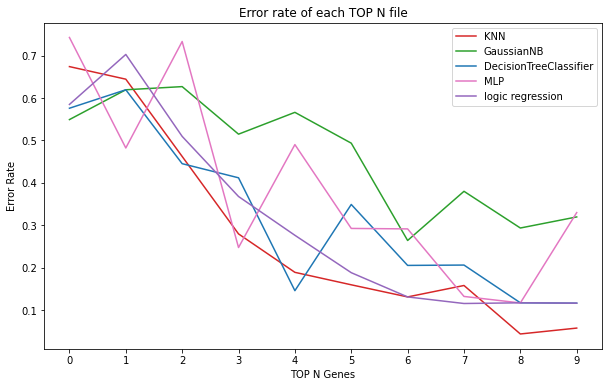

In [486]:
error_arr = arr[:,1:]

cdict = {0: 'indigo',1: 'magenta', 2: 'blue', 3: 'green', 4: 'red'}
plt.figure(figsize = (10,6))

plt.plot(error_arr[:,0],c = 'tab:red', label = 'KNN')
plt.plot(error_arr[:,1],c = 'tab:green', label = 'GaussianNB')
plt.plot(error_arr[:,2],c = 'tab:blue', label = 'DecisionTreeClassifier')
plt.plot(error_arr[:,3],c = 'tab:pink', label = 'MLP')
plt.plot(error_arr[:,4],c = 'tab:purple', label = 'logic regression')

lg = plt.legend()
xt = plt.xticks([0,1,2,3,4,5,6,7,8,9])
titl = plt.title("Error rate of each TOP N file")
yl = plt.xlabel("TOP N Genes")
yl = plt.ylabel("Error Rate")

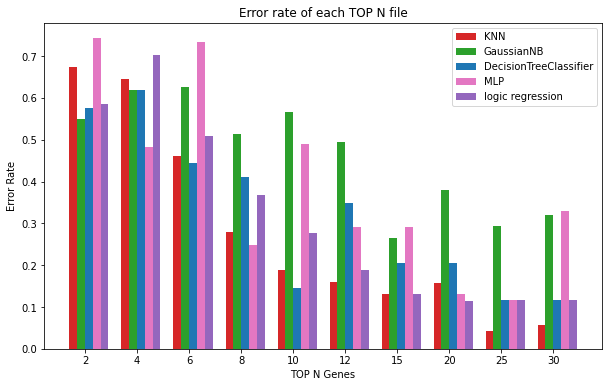

In [487]:
error_rate_array = arr[:,1:]

plt.figure(figsize=(10, 6))
xlabels = ['2','4','6','8','10','12','15','20','25','30']

plt.subplot()
x = np.arange(len(xlabels))  # x-axis scale label position
width = 0.15  

plt.bar(x - 1.5*width, error_rate_array[:,0], width, label='KNN',color = 'tab:red')
plt.bar(x - 0.5*width, error_rate_array[:,1], width, label='GaussianNB',color = 'tab:green')
plt.bar(x + 0.5*width, error_rate_array[:,2], width, label='DecisionTreeClassifier',color = 'tab:blue')
plt.bar(x + 1.5*width, error_rate_array[:,3], width, label='MLP',color = 'tab:pink')
plt.bar(x + 2.5*width, error_rate_array[:,4], width, label='logic regression',color = 'tab:purple')
plt.ylabel('Error Rate')
plt.title('Error rate of each TOP N file')
plt.xlabel('TOP N Genes')
plt.xticks(x, labels=xlabels)
plt.legend()
plt.show()

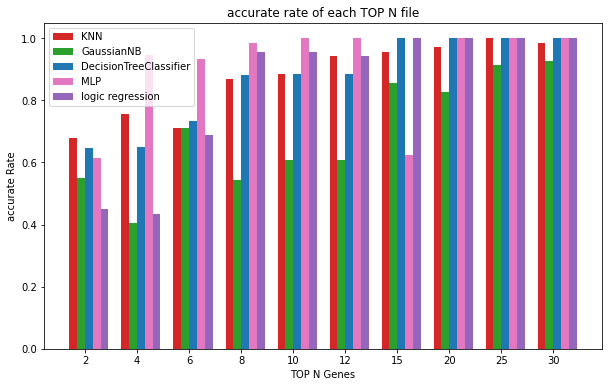

In [488]:
error_rate_array = arr_error[:,1:]

plt.figure(figsize=(10, 6))
xlabels = ['2','4','6','8','10','12','15','20','25','30']

plt.subplot()
x = np.arange(len(xlabels))  # x-axis scale label position
width = 0.15  

plt.bar(x - 1.5*width, error_rate_array[:,0], width, label='KNN',color = 'tab:red')
plt.bar(x - 0.5*width, error_rate_array[:,1], width, label='GaussianNB',color = 'tab:green')
plt.bar(x + 0.5*width, error_rate_array[:,2], width, label='DecisionTreeClassifier',color = 'tab:blue')
plt.bar(x + 1.5*width, error_rate_array[:,3], width, label='MLP',color = 'tab:pink')
plt.bar(x + 2.5*width, error_rate_array[:,4], width, label='logic regression',color = 'tab:purple')
plt.ylabel('accurate Rate')
plt.title('accurate rate of each TOP N file')
plt.xlabel('TOP N Genes')
plt.xticks(x, labels=xlabels)
plt.legend()
plt.show()

# Step 4. Generate predictions for the test set

In [489]:
filename="pp5i_train.bestN.csv"
x_trainBestN = np.genfromtxt(filename,delimiter=',') 
y_trainBestN = best_genes_class


if best_classifier_value=='KNeighborsClassifier':
    BestNModel = skneighbors.KNeighborsClassifier(n_neighbors=3)
elif best_classifier_value=='GaussianNB':
    BestNModel = GaussianNB()
elif best_classifier_value=='DecisionTreeClassifier':
    BestNModel = DecisionTreeClassifier(random_state=30, max_depth=3)
elif best_classifier_value=='MLPClassifier':
    BestNModel = MLPClassifier(activation = 'relu', solver = 'sgd', hidden_layer_sizes= (25, 25),random_state = 1, max_iter=250)
elif best_classifier_value=='LogisticRegression':
    BestNModel = LogisticRegression(random_state = 21)
  
BestNModel.fit(x_trainBestN,y_trainBestN)

scores = cross_val_score(BestNModel, x_trainBestN, y_trainBestN,cv=4)
accuracy = np.mean(scores)

score = BestNModel.score(x_trainBestN, y_trainBestN)

print("Top N =",num,"; Best Clasifier =",best_classifier_value,"; Cross-validation Best Accuracy",accuracy,"; accuracy score:", score)

Top N = 25 ; Best Clasifier = KNeighborsClassifier ; Cross-validation Best Accuracy 0.9566993464052287 ; accuracy score: 1.0


In [490]:
scores

array([0.94444444, 0.94117647, 1.        , 0.94117647])

Once you found the gene set with the lowest cross-validation error, you can vary 
1-2 additional relevant parameters for each classifier to see if the accuracy will 
improve.

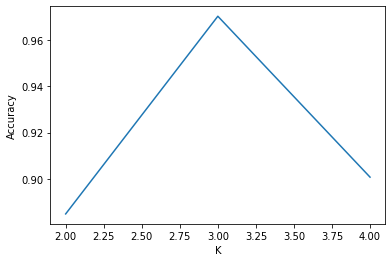

In [491]:
filename="pp5i_train.top"+str(num)+".gr.csv"
data_arr = np.genfromtxt(filename,delimiter=',') 
train_x = data_arr[:,:-1]
train_y = data_arr[:,-1]

#get the best K 
k_range = [2,3,4] # For K-NN, test accuracy with K=2, 3 and 4
cv_scores = []
for n in k_range:
  #knn_model = skneighbors.KNeighborsClassifier(n_neighbors=3)
  knn_model = skneighbors.KNeighborsClassifier(n_neighbors=n)
  knn_model.fit(train_x, train_y)
  scores = cross_val_score(knn_model, train_x, train_y,cv=9)
  cv_scores.append(scores.mean())
plt.plot(k_range,cv_scores)
plt.xlabel('K')
plt.ylabel('Accuracy')		#get the best K from graph
plt.show()

In [492]:
#get the best K of KNN
cv_max_scores = max(cv_scores)
p = cv_scores.index(cv_max_scores)
best_k = k_range[p]
print("The best K of KNN is ", best_k)

The best K of KNN is  3


In [493]:
filename="pp5i_test.bestN.csv"
x_testN = np.genfromtxt(filename,delimiter=',') 

num_out = BestNModel.predict(x_testN)

test_class = lableEncode.inverse_transform(num_out.astype(int))# decode test_class
print("predictions of test set=",test_class)

predictions of test set= ['MGL' 'EPD' 'MED' 'MED' 'EPD' 'MED' 'MED' 'MED' 'EPD' 'JPA' 'JPA' 'MED'
 'MED' 'MED' 'MED' 'MED' 'MGL' 'MED' 'RHB' 'RHB' 'RHB' 'MED' 'MED']


# adaptive boosting


In [494]:
from sklearn.ensemble import AdaBoostClassifier

In [495]:
weak_learner = DecisionTreeClassifier(random_state=30, max_depth=3)
adaboost = AdaBoostClassifier(base_estimator=weak_learner,n_estimators=5, algorithm="SAMME.R",random_state=None)
adaboost.fit(train_x, train_y)
adaboost_score = adaboost.score(train_x, train_y)
adaboost_pred = adaboost.predict(x_testN)
test_class_ = lableEncode.inverse_transform(adaboost_pred.astype(int))
print("adaboost_score of decision tree:\n",adaboost_score)
print("Test dataset predictions :\n",test_class)

adaboost_score of decision tree:
 1.0
Test dataset predictions :
 ['MGL' 'EPD' 'MED' 'MED' 'EPD' 'MED' 'MED' 'MED' 'EPD' 'JPA' 'JPA' 'MED'
 'MED' 'MED' 'MED' 'MED' 'MGL' 'MED' 'RHB' 'RHB' 'RHB' 'MED' 'MED']


In [496]:
weak_learner = LogisticRegression(random_state = 21)
adaboost = AdaBoostClassifier(base_estimator=weak_learner,n_estimators=5, algorithm="SAMME.R",random_state=None)
adaboost.fit(train_x, train_y)
adaboost_score = adaboost.score(train_x, train_y)
adaboost_pred = adaboost.predict(x_testN)
test_class_ = lableEncode.inverse_transform(adaboost_pred.astype(int))
print("adaboost_score of decision tree:\n",adaboost_score)
print("Test dataset predictions :\n",test_class)

adaboost_score of decision tree:
 1.0
Test dataset predictions :
 ['MGL' 'EPD' 'MED' 'MED' 'EPD' 'MED' 'MED' 'MED' 'EPD' 'JPA' 'JPA' 'MED'
 'MED' 'MED' 'MED' 'MED' 'MGL' 'MED' 'RHB' 'RHB' 'RHB' 'MED' 'MED']


In [497]:
weak_learner = GaussianNB()
adaboost = AdaBoostClassifier(base_estimator=weak_learner,n_estimators=5, algorithm="SAMME.R",random_state=None)
adaboost.fit(train_x, train_y)
adaboost_score = adaboost.score(train_x, train_y)
adaboost_pred = adaboost.predict(x_testN)
test_class_ = lableEncode.inverse_transform(adaboost_pred.astype(int))
print("adaboost_score of Naïve Bayes:\n",adaboost_score)
print("Test dataset predictions :\n",test_class)

adaboost_score of Naïve Bayes:
 0.782608695652174
Test dataset predictions :
 ['MGL' 'EPD' 'MED' 'MED' 'EPD' 'MED' 'MED' 'MED' 'EPD' 'JPA' 'JPA' 'MED'
 'MED' 'MED' 'MED' 'MED' 'MGL' 'MED' 'RHB' 'RHB' 'RHB' 'MED' 'MED']
